# Evaluation Project - 8
Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

 

Note: You can find the dataset in the link below. 



Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects

In [1]:
import pandas as pd
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing train dataset
train = pd.read_excel("D:\Data_Train.xlsx")
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#importing test dataset
test = pd.read_excel("D:\Test_set (2).xlsx")
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
# final outcome values sample for our reference

sample_sub = pd.read_excel("D:\Sample_submission.xlsx")
sample_sub.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


#### Obs: The given dataset has all the 10 categorical values for features, and the label 'Price' is a continuous one. Therefore this is a regression problem.

In [5]:
train.shape

(10683, 11)

In [6]:
test.shape

(2671, 10)

#### Obs: Now we will use this train dataset for model building and test dataset to predict the label.

In [7]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### Obs: All the features are object datatypes, however the label 'Price' is an int type

In [8]:
test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

#### Obs: All the features are object datatypes

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [11]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [13]:
train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [14]:
test.nunique

<bound method DataFrame.nunique of                 Airline Date_of_Journey    Source Destination  \
0           Jet Airways       6/06/2019     Delhi      Cochin   
1                IndiGo      12/05/2019   Kolkata    Banglore   
2           Jet Airways      21/05/2019     Delhi      Cochin   
3     Multiple carriers      21/05/2019     Delhi      Cochin   
4              Air Asia      24/06/2019  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
0     DEL → BOM → COK    17:30  04:25 07 Jun  10h 55m      1 stop   
1     CCU → MAA → BLR    06:20         10:20  

# Checking nulls

In [15]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Obs: There is 1 null value in Route feature and 1 null value in Total_Stops in Train dataset.

In [16]:
test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

#### Obs: There are no nulls in test dataset.

In [17]:
# filling null values with the MODE values in categorical column
train['Route']=train['Route'].fillna(train['Route'].mode()[0])
train['Total_Stops']=train['Total_Stops'].fillna(train['Total_Stops'].mode()[0])

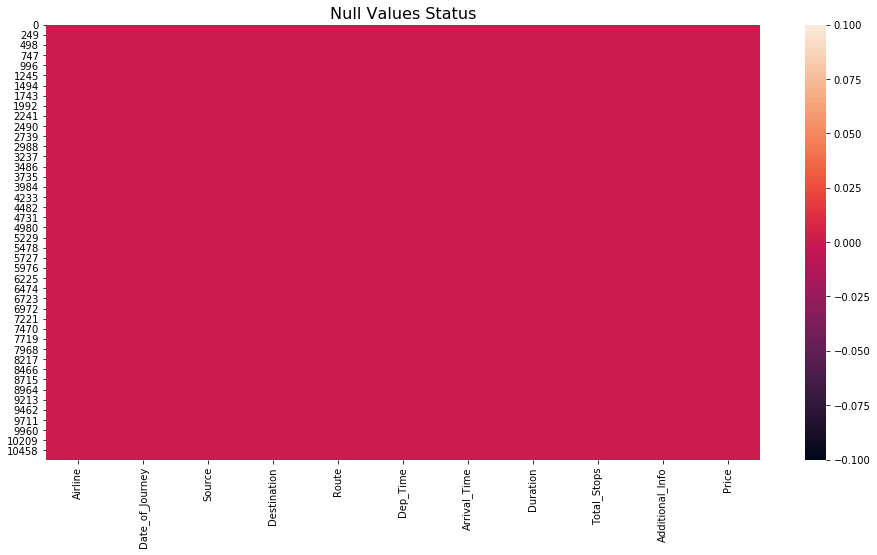

In [18]:
# ploting heatmapfor showing null values status
plt.figure(figsize=(16,8))
plt.title('Null Values Status',fontsize=16)
sns.heatmap(train.isnull());

# Statistical Summary

In [19]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


#### Obs: Minimum price of a flight ticket is 1759 and maximum price is 79512. That is a big gap maybe skewness is present.
The difference of quartile 3 and maximum value is big. So, right skewness might be there.

In [20]:
test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


#### Obs: There is no missing value present in the test dataset as the count is 2671. 
Airline is having 11 categories of data out of which Jet Airways is the most preferable airline.
Travellers mostly use jet airways to go to Cochin from Delhi(as the frequency is same) where there is only one stop.

# Data Analysis

We will do Univariate Analysis to understand the distribution of continuous label and count of the categorical features. Then we will do Bivariate Analysis to understand relation between feature vs target and feature vs feature. After that we will do multivariate Analysis to check multicolinearity and correlation.

### Univariate analysis

Min Price  1759
Max Price  79512


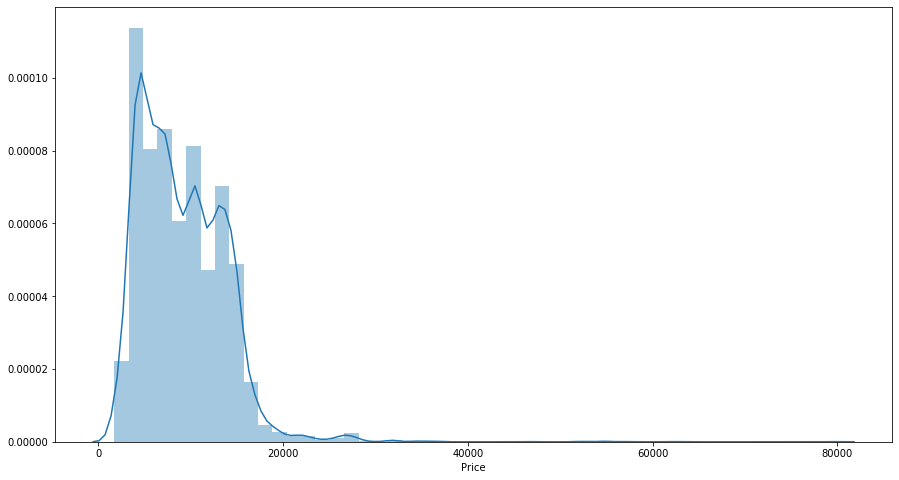

In [21]:
plt.figure(figsize=(15,8))
sns.distplot(train['Price']);
print('Min Price ',train['Price'].min())
print('Max Price ',train['Price'].max())

#### Obs: the price of a flight ticket is ranging from 1759 to 79512the data is right skewed

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

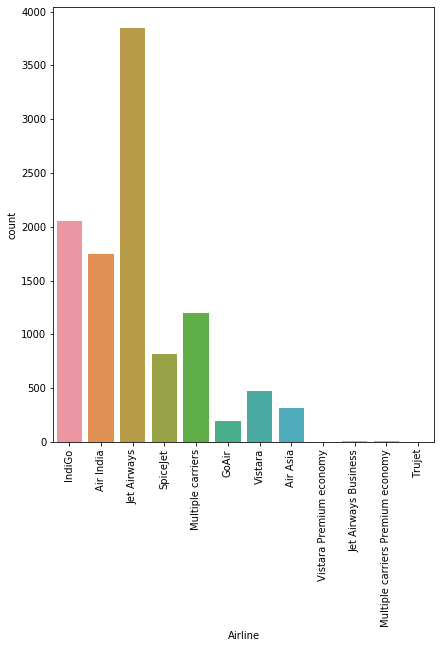

In [22]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(train['Airline'])
plt.xticks(rotation=90)
train['Airline'].value_counts()

#### Obs: the most preferable or highest flying airline is Jet Airways(3849) and least flying airline is trujet(1).

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

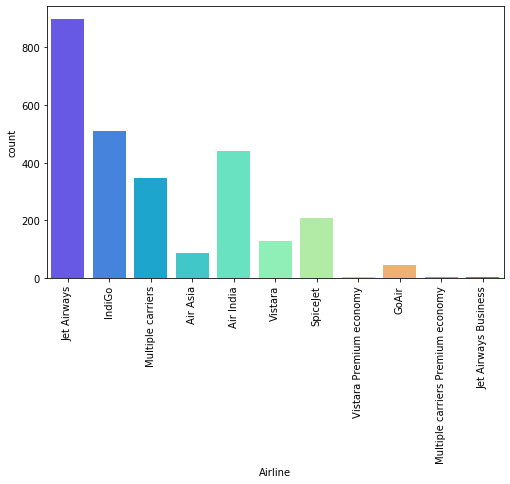

In [23]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(test['Airline'],palette='rainbow')
plt.xticks(rotation=90)
test['Airline'].value_counts()

#### Obs: the most preferable or highest flying airline is Jet Airways ( 897 ) and least flying Jet Airways Business ( 2 ).

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

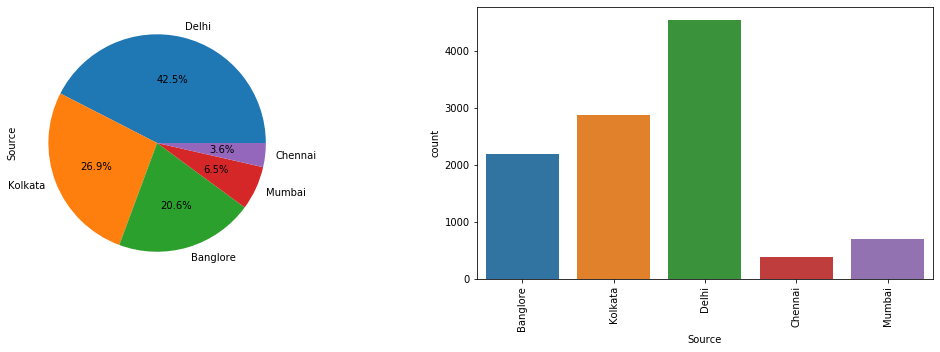

In [24]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
train['Source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['Source'])
plt.xticks(rotation=90)
train['Source'].value_counts()

#### Obs: According to train dataset 42.5% of flights start their journey mainly from Delhi ( 4536 ) then kolkata ( 2871 ) and least count of flights (3.6%) start journey from Chennai ( 381 ).

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

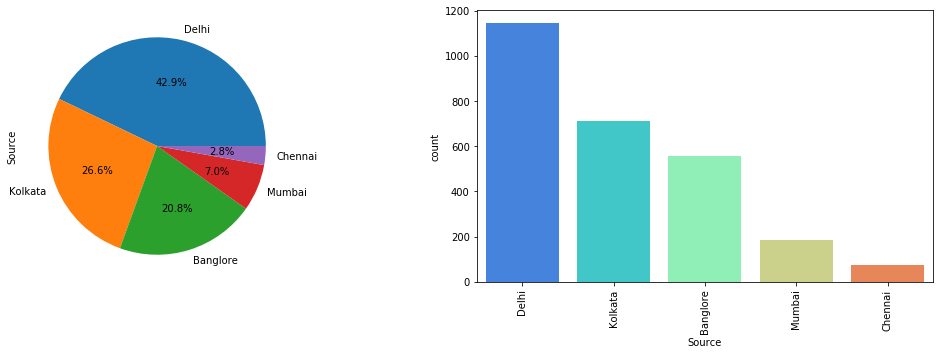

In [25]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
test['Source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['Source'],palette='rainbow')
plt.xticks(rotation=90)
test['Source'].value_counts()

#### Obs: dataset 42.9% of flight start their journey mainly from Delhi ( 1145 ) then kolkata ( 710 ) and least count of flights (2.8%) start journey from Chennai ( 75 ).

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

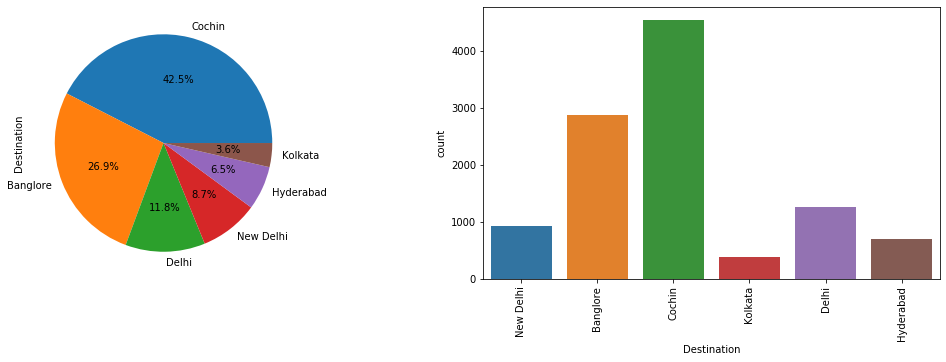

In [26]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
train['Destination'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['Destination'])
plt.xticks(rotation=90)
train['Destination'].value_counts()

#### Obs: According to train dataset 42.5% of flights main destination is Cochin ( 4536 ) then Banglore ( 2871 ) and least count of flights (3.6%) travel to Kolkata ( 381 ).

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

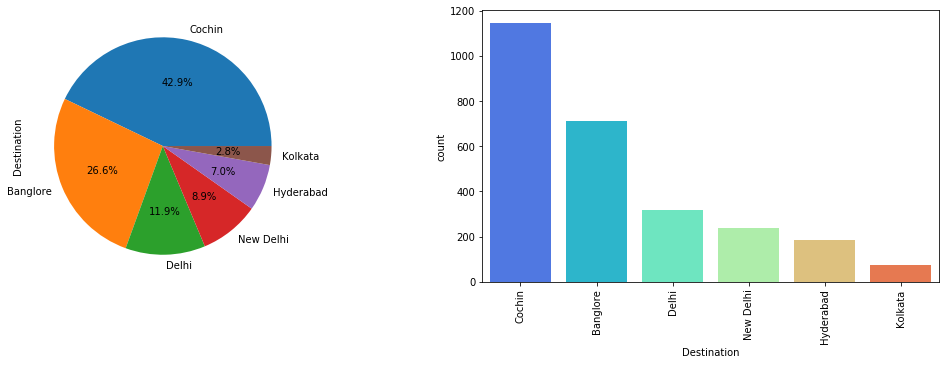

In [27]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
test['Destination'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['Destination'],palette='rainbow')
plt.xticks(rotation=90)
test['Destination'].value_counts()

#### Obs: dataset 42.9% of flights main destination is Cochin ( 1145 ) then Banglore ( 710 ) and least count of flights (2.8%) are travelling to Kolkata ( 75 ).

In [28]:
train['Route'].value_counts()

DEL → BOM → COK          2377
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
BOM → VNS → DEL → HYD       1
CCU → IXB → DEL → BLR       1
BOM → NDC → HYD             1
BOM → RPR → VTZ → HYD       1
BOM → DED → DEL → HYD       1
Name: Route, Length: 128, dtype: int64

In [29]:
test['Route'].value_counts()

DEL → BOM → COK          624
BLR → DEL                389
CCU → BOM → BLR          253
CCU → BLR                172
BOM → HYD                164
                        ... 
BLR → VGA → VTZ → DEL      1
BLR → BOM → IDR → DEL      1
BLR → BDQ → DEL            1
BLR → VGA → HYD → DEL      1
BLR → BOM → UDR → DEL      1
Name: Route, Length: 100, dtype: int64

In [30]:
train['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
03:00      1
16:25      1
04:50      1
21:40      1
04:15      1
Name: Dep_Time, Length: 222, dtype: int64

In [31]:
test['Dep_Time'].value_counts()

10:00    62
18:55    55
20:00    53
14:05    51
17:00    48
         ..
13:30     1
16:35     1
23:00     1
04:50     1
13:50     1
Name: Dep_Time, Length: 199, dtype: int64

In [32]:
train['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
12:05 02 Mar      1
18:30 13 Jun      1
03:35 10 Apr      1
11:10 25 May      1
00:40 07 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [33]:
test['Arrival_Time'].value_counts()

19:00           113
21:00           106
19:15           101
12:35            37
16:10            31
               ... 
10:20 02 Mar      1
00:15 19 May      1
10:55 10 Jun      1
07:40 19 May      1
00:40 19 Mar      1
Name: Arrival_Time, Length: 704, dtype: int64

In [34]:
train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
4h 10m       1
33h 45m      1
47h          1
32h 20m      1
5m           1
Name: Duration, Length: 368, dtype: int64

In [35]:
test['Duration'].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
16h 30m      1
19h 45m      1
22h 40m      1
7h 10m       1
32h 5m       1
Name: Duration, Length: 320, dtype: int64

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

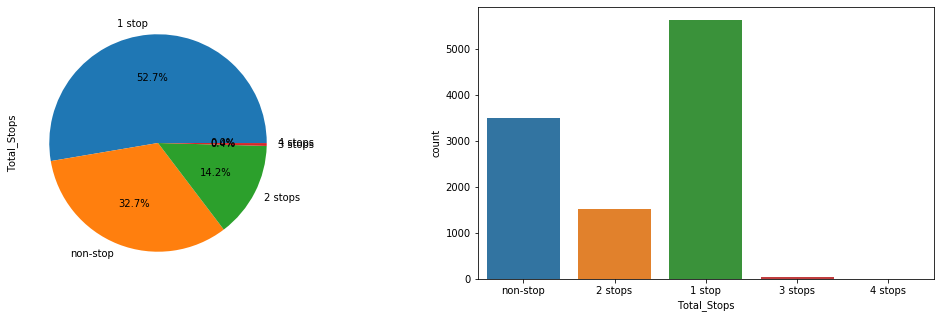

In [36]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
train['Total_Stops'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['Total_Stops'])
train['Total_Stops'].value_counts()

#### Obs: Highest counts of flights stop for 1 stop 5625 (52.7%) and then there are non stop flights (for less distant destinations) and least count of flights stop for 4 stop only 1.

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

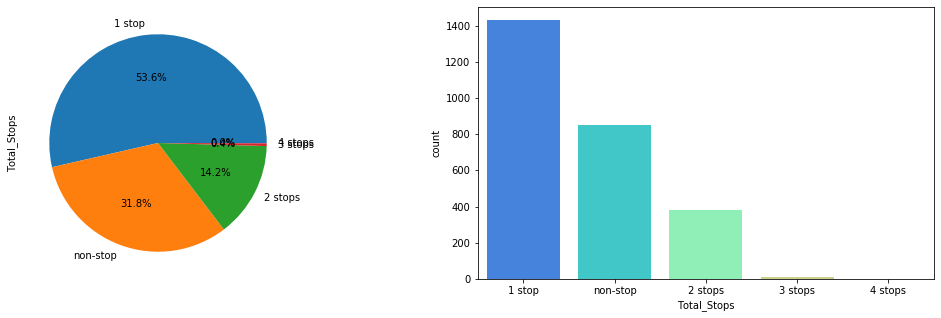

In [37]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
test['Total_Stops'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['Total_Stops'],palette='rainbow')
test['Total_Stops'].value_counts()

#### Obs: Highest counts of flights stop for 1 stop 1431 ( 53.6% ) least count of flights stop for 4 stops only 1.

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

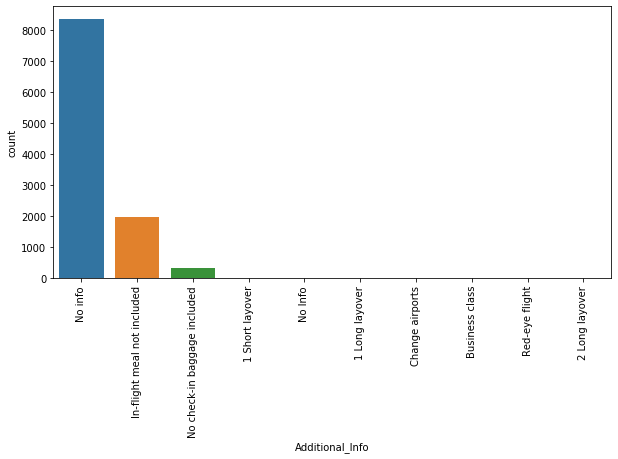

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(train['Additional_Info'])
plt.xticks(rotation=90)
train['Additional_Info'].value_counts()

#### Obs: train dataset, 8344 no. of flights have no additional information. 2 Long layover is the least additional information and it counts 2.

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
Change airports                    1
1 Long layover                     1
Name: Additional_Info, dtype: int64

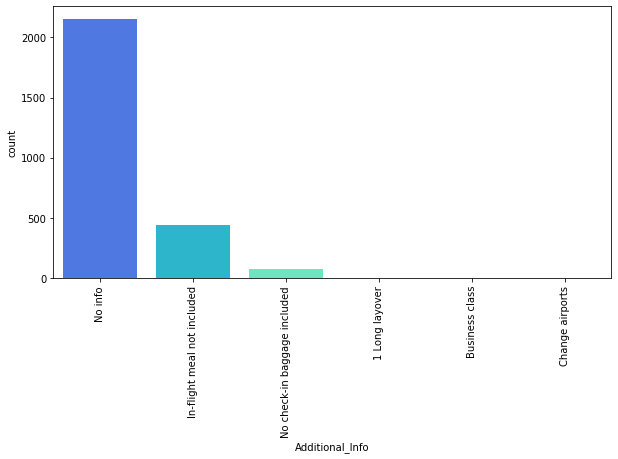

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(test['Additional_Info'],palette='rainbow')
plt.xticks(rotation=90)
test['Additional_Info'].value_counts()

#### Obs:test dataset, Mostly flights have no additional information and the count is 2148. Change airports is the least additional information and it counts only 1.

# Bivariate Analysis

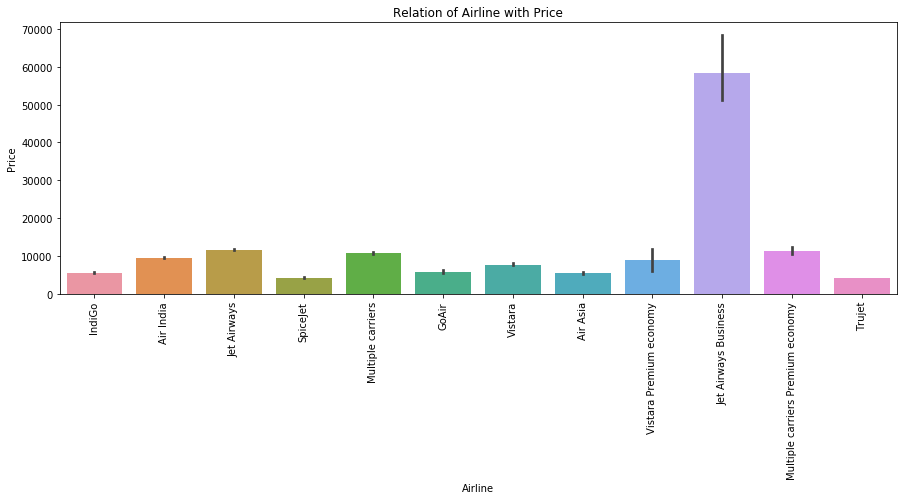

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(x='Airline',y='Price',data=train).set_title('Relation of Airline with Price')
plt.xticks(rotation=90)
plt.show();

#### Obs:Jet Airways Business is the costliest of all the airlines according to train dataset. It costs 60,000 onwards. And Trujet and Spicejet are the least pricey airlines.

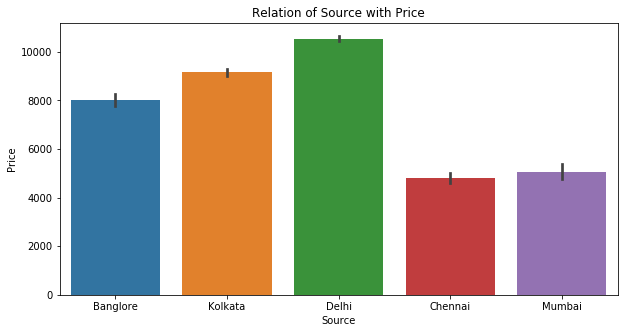

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x='Source',y='Price',data=train).set_title('Relation of Source with Price')
plt.show();

#### Obs: Flights take off from Delhi are the costliest ones. Whereas Flights take off from Chennai is more cost effective.

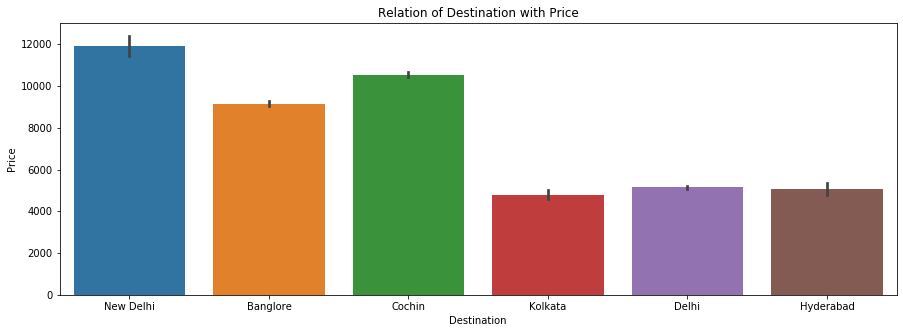

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(x='Destination',y='Price',data=train).set_title('Relation of Destination with Price')
plt.show()

#### Obs: Flights touch down New Delhi are the costliest ones, and 2nd costlier destination according to flight price is Cochin. Whereas Flights land to Kolkata are more cost effective.

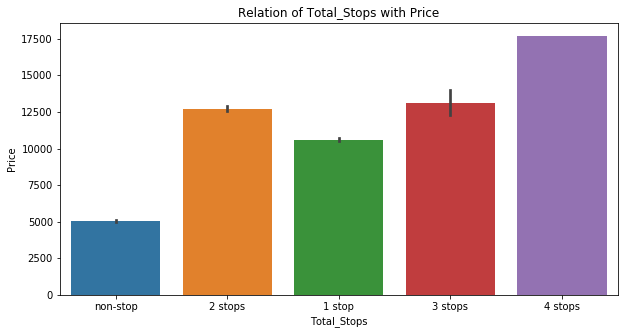

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x='Total_Stops',y='Price',data=train).set_title('Relation of Total_Stops with Price')
plt.show()

#### Obs: flights with more stops are expensive.

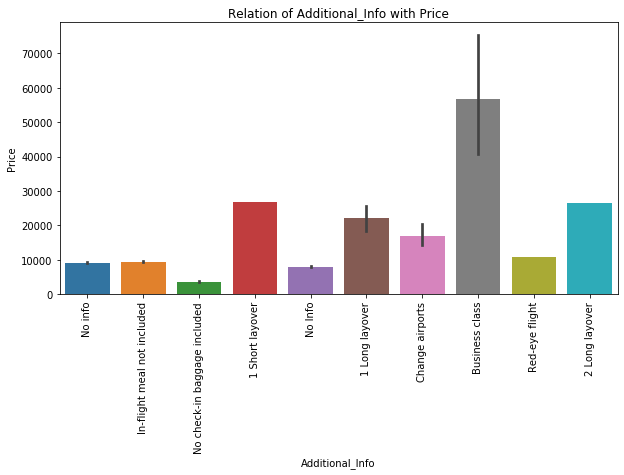

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x='Additional_Info',y='Price',data=train).set_title('Relation of Additional_Info with Price')
plt.xticks(rotation=90)
plt.show();

#### Obs: Travelling by Business class is very expensive, And No check-in baggage included flights are cost effective.

# Multivariate Analysis

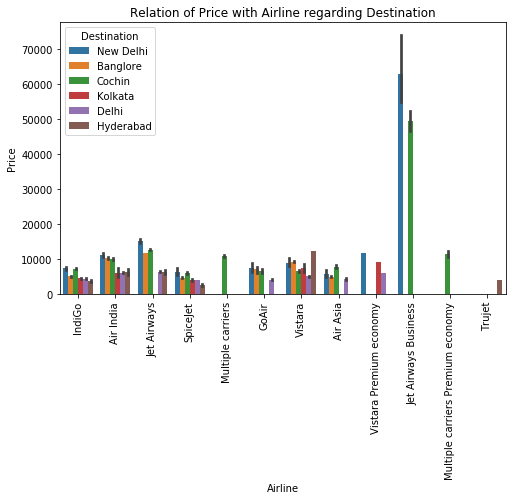

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x='Airline',y='Price',hue='Destination',data=train).set_title('Relation of Price with Airline regarding Destination')
plt.xticks(rotation=90)
plt.show();

#### Obs: travelling to New Delhi or Cochin by Jet Airways business is the costliest.

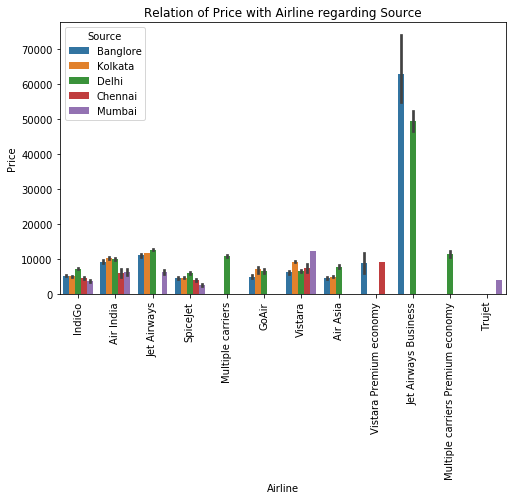

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(x='Airline',y='Price',hue='Source',data=train).set_title('Relation of Price with Airline regarding Source')
plt.xticks(rotation=90)
plt.show();

#### Obs: travelling from Delhi and Banglore by Jet Airways business is the costliest.

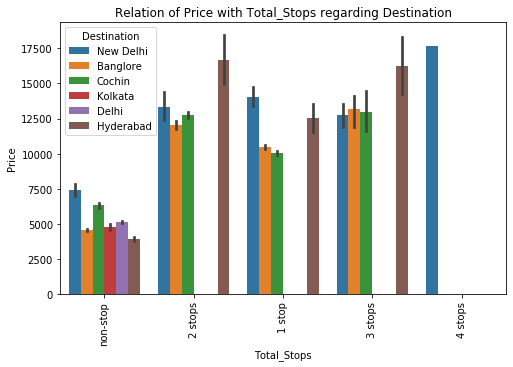

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x='Total_Stops',y='Price',hue='Destination',data=train).set_title('Relation of Price with Total_Stops regarding Destination')
plt.xticks(rotation=90)
plt.show()

#### Obs: Non stop flights are more economical than flights those halt more.

# Data Engineering (Train Data)

In [48]:
# most of the columns are having nominaldata
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


for better understanding we split the data

#### 1. Conversion of date_of_journey:

In [49]:
# Creating 3 different columns for day, month and year data
train['year'] = pd.DatetimeIndex(train['Date_of_Journey']).year 
train['month'] = pd.DatetimeIndex(train['Date_of_Journey']).month 
train['day'] = pd.DatetimeIndex(train['Date_of_Journey']).day

train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [50]:
#the Date_of_Journey column is not needed
train.drop(["Date_of_Journey"],axis = 1,inplace = True)

#### 2.Conversion of the Dep_time:

In [51]:
# Creating 2 different columns for hour and minutes data
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute

train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3,16,50


In [52]:
# Dropping the Dep_Time data as it's not needed
train.drop(["Dep_Time"],axis =1,inplace = True)

#### 3.Conversion of Arrival_Time:

In [53]:
# Creating 2 different columns for hour and minutes from Arrival_Time data
train["Arrival_hour"]=pd.to_datetime(train.Arrival_Time).dt.hour
train["Arrival_min"] = pd.to_datetime(train.Arrival_Time).dt.minute

train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,2019,1,3,16,50,21,35


In [54]:
# Dropping the Arival_Time data as it's already separated into hours and minutes in two different columns
train.drop(["Arrival_Time"],axis = 1,inplace=True)

#### 4. Conversion of duration:

The Duration column is not having the time data as time or date data as they were in Dep_Time or in Arrival time. The format is different. And for that we can not use datetime module. Hence we will make two different columns, duration_mins and duration_hours out of Duration column by iterating through forloops

In [55]:
duration = list(train["Duration"])# Assigning Duration column into list

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Checking if duration contains only hour or mins
        if "h" in duration[i]:           # if there 'h' present
            duration[i] = duration[i].strip() + " 0m"   # then Add 0 as minute
        else:
            duration[i] = "0h " + duration[i]           # Add 0 as hour

duration_hours = []  # the new duration_hours column after conversion
duration_mins = []   # the new duration_minutes column after conversion   
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extracting hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracting  minutes from duration

In [56]:
#Adding the duration columns in the train dataset
train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins

In [57]:
#  As the Extraction is done, now we can drop the old Duration column
train.drop(["Duration"],axis=1,inplace=True)
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,16,50,21,35,4,45


day, month and year columns are made out of Date_of_journey, Dep_hour and Dep_min columns are made out of Dep_Time, Arrival_hour and Arrival_min columns are made out of Arrival_time and Duration_hours and Duration_mins are made out of Duration column of the train data. All the newly assign columns are looking more simple than before.

Now we do the same thing with test data as well:

# Data Engineering (Test data ):

In [58]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


for better understanding we split the data

#### 1. Conversion of date_of_journey:

In [59]:
# Creating 3 different columns for day, month and year data
test['year'] = pd.DatetimeIndex(test['Date_of_Journey']).year 
test['month'] = pd.DatetimeIndex(test['Date_of_Journey']).month 
test['day'] = pd.DatetimeIndex(test['Date_of_Journey']).day

In [60]:
# Now the Date_of_Journey column is not needed
test.drop(["Date_of_Journey"],axis = 1,inplace = True)

In [61]:
#the test dataset is having 3 different columns for day, month and year
test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,year,month,day
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,2019,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,2019,5,21
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24


#### 2. Conversion of the Dep_time:

In [62]:
# Creating 2 different columns for hour and minutes data
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute

In [63]:
# Dropping the Dep_Time data as it's not needed
test.drop(["Dep_Time"],axis = 1,inplace = True)

In [64]:
#the test dataset is having 2 more different columns Dep_hour and Dep_min
test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,year,month,day,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,2019,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,2019,5,21,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24,23,55


#### 3. Conversion of Arrival_Time:

In [65]:
# Creating 2 different columns for hour and minutes from Arrival_Time data
test["Arrival_hour"]=pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_min"] = pd.to_datetime(test.Arrival_Time).dt.minute

# Dropping the Arival_Time data as it's already separated into hours and minutes in two different columns
test.drop(["Arrival_Time"],axis = 1,inplace = True)

In [66]:
#the test dataset is having 2 more different columns Arrival_hour ,Arrival_min
test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,2019,6,24,23,55,2,45


#### 4. Conversion of duration:

The Duration column is not having the time data as time or date data were in Dep_Time or in Arrival_time. The format is different. And for that we can not use datetime module. Hence, we will make two different columns, duration_mins and duration_hours out of Duration column by iterating through forloops

In [67]:
duration = list(test["Duration"])# Assigning Duration column into list

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Checking if duration contains only hour or mins
        if "h" in duration[i]:           # if there 'h' present
            duration[i] = duration[i].strip() + " 0m"   # then Add 0 as minute
        else:
            duration[i] = "0h " + duration[i]           # Add 0 as hour

duration_hours = []  # the new duration_hours column after conversion
duration_mins = []   # the new duration_minutes column after conversion   
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extracting hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracting  minutes from duration

In [68]:
# Adding the duration columns in the train dataset
test["Duration_hours"] = duration_hours
test["Duration_mins"] = duration_mins

In [69]:
# As the Extraction is done, now we can drop the old Duration column
test.drop(["Duration"],axis=1,inplace=True)
test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,2019,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,2019,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,2019,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,2019,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,2019,6,24,23,55,2,45,2,50


day, month and year columns are made out of Date_of_journey, Dep_hour and Dep_min columns are made out of Dep_Time, Arrival_hour and Arrival_min columns are made out of Arrival_time and Duration_hours and Duration_mins are made out of Duration column of the test data. All the newly assign columns are looking more simple than before.

# Encoding of train DataFrame:

In [70]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [71]:
for i in train.columns:
    if train[i].dtypes == "object":
        train[i] = enc.fit_transform(train[i].values.reshape(-1,1))
        
train.head()        

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3.0,0.0,5.0,18.0,4.0,8.0,3897,2019,3,24,22,20,1,10,2,50
1,1.0,3.0,0.0,84.0,1.0,8.0,7662,2019,1,5,5,50,13,15,7,25
2,4.0,2.0,1.0,118.0,1.0,8.0,13882,2019,9,6,9,25,4,25,19,0
3,3.0,3.0,0.0,91.0,0.0,8.0,6218,2019,12,5,18,5,23,30,5,25
4,3.0,0.0,5.0,29.0,0.0,8.0,13302,2019,1,3,16,50,21,35,4,45


# Encoding of test DataFrame:

In [72]:
for i in test.columns:
    if test[i].dtypes == "object":
        test[i] = enc.fit_transform(test[i].values.reshape(-1,1))
        
test.head()        

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,4.0,2.0,1.0,76.0,0.0,5.0,2019,6,6,17,30,4,25,10,55
1,3.0,3.0,0.0,65.0,0.0,5.0,2019,12,5,6,20,10,20,4,0
2,4.0,2.0,1.0,76.0,0.0,3.0,2019,5,21,19,15,19,0,23,45
3,6.0,2.0,1.0,76.0,0.0,5.0,2019,5,21,8,0,21,0,13,0
4,0.0,0.0,2.0,16.0,4.0,5.0,2019,6,24,23,55,2,45,2,50


# Correlation

In [73]:
train.corr()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Airline,1.000000,-0.013401,0.018479,0.025118,0.036064,-0.060802,-0.039520,NaN,-0.007918,0.031218,-0.035194,-0.060044,-0.007491,-0.071089,-0.158285,-0.028088
Source,-0.013401,1.000000,-0.592574,0.403403,-0.225601,-0.022107,0.015998,NaN,0.063052,0.007560,0.059044,-0.056991,0.025632,0.021040,0.166109,-0.145187
Destination,0.018479,-0.592574,1.000000,-0.461183,0.337883,0.026806,-0.071112,NaN,-0.105039,-0.052076,-0.072979,0.127892,-0.039710,0.017196,-0.258459,0.061214
Route,0.025118,0.403403,-0.461183,1.000000,-0.437783,0.035188,0.164118,NaN,0.042204,0.096530,-0.075044,-0.067984,0.013851,-0.173345,0.295515,-0.232364
Total_Stops,0.036064,-0.225601,0.337883,-0.437783,1.000000,0.164009,-0.571174,NaN,-0.056524,0.043907,0.039268,0.048813,-0.095598,0.175973,-0.606168,0.182161
Additional_Info,-0.060802,-0.022107,0.026806,0.035188,0.164009,1.000000,-0.065478,NaN,-0.009098,-0.019456,-0.051010,-0.019339,0.026173,0.041311,-0.168725,0.046941
Price,-0.039520,0.015998,-0.071112,0.164118,-0.571174,-0.065478,1.000000,NaN,0.010700,-0.165412,0.006819,-0.024492,0.024264,-0.086155,0.508672,-0.124874
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.007918,0.063052,-0.105039,0.042204,-0.056524,-0.009098,0.010700,NaN,1.000000,-0.264899,0.028180,0.002152,-0.004338,-0.025786,0.055568,-0.018587
day,0.031218,0.007560,-0.052076,0.096530,0.043907,-0.019456,-0.165412,NaN,-0.264899,1.000000,-0.002251,-0.016521,-0.002124,-0.021424,-0.038081,-0.007764


In [74]:
test.corr()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,year,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Airline,1.000000,-0.031107,0.033630,0.023995,0.039236,-0.084423,NaN,0.002859,0.005981,0.003731,-0.047850,-0.018313,-0.097714,-0.180405,-0.047461
Source,-0.031107,1.000000,-0.578296,0.339434,-0.212995,-0.025205,NaN,0.050773,-0.026188,0.056065,-0.064886,0.001719,-0.008304,0.153565,-0.141338
Destination,0.033630,-0.578296,1.000000,-0.444760,0.331240,0.026295,NaN,-0.102206,-0.022735,-0.049023,0.153330,-0.004945,0.037196,-0.246831,0.071332
Route,0.023995,0.339434,-0.444760,1.000000,-0.441772,0.059682,NaN,0.070077,0.051829,-0.137575,-0.045161,0.003447,-0.213024,0.282342,-0.222194
Total_Stops,0.039236,-0.212995,0.331240,-0.441772,1.000000,0.136402,NaN,-0.066047,0.072098,0.072496,0.051715,-0.097218,0.196301,-0.594594,0.172346
Additional_Info,-0.084423,-0.025205,0.026295,0.059682,0.136402,1.000000,NaN,-0.008463,-0.021366,-0.072889,0.007971,0.010917,0.034007,-0.142190,0.045006
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.002859,0.050773,-0.102206,0.070077,-0.066047,-0.008463,NaN,1.000000,-0.258004,0.007080,0.001781,0.009595,-0.038251,0.091627,-0.026096
day,0.005981,-0.026188,-0.022735,0.051829,0.072098,-0.021366,NaN,-0.258004,1.000000,-0.022912,-0.025724,0.015416,-0.010006,-0.059340,0.018906
Dep_hour,0.003731,0.056065,-0.049023,-0.137575,0.072496,-0.072889,NaN,0.007080,-0.022912,1.000000,-0.034524,0.000147,0.066751,-0.019739,-0.022836


#### Obs: We have all NaN values in year column of both train and test datasets. We will drorp the year column in both the datasets.

In [75]:
train.drop('year',axis=1,inplace=True)

test.drop('year',axis=1,inplace=True)

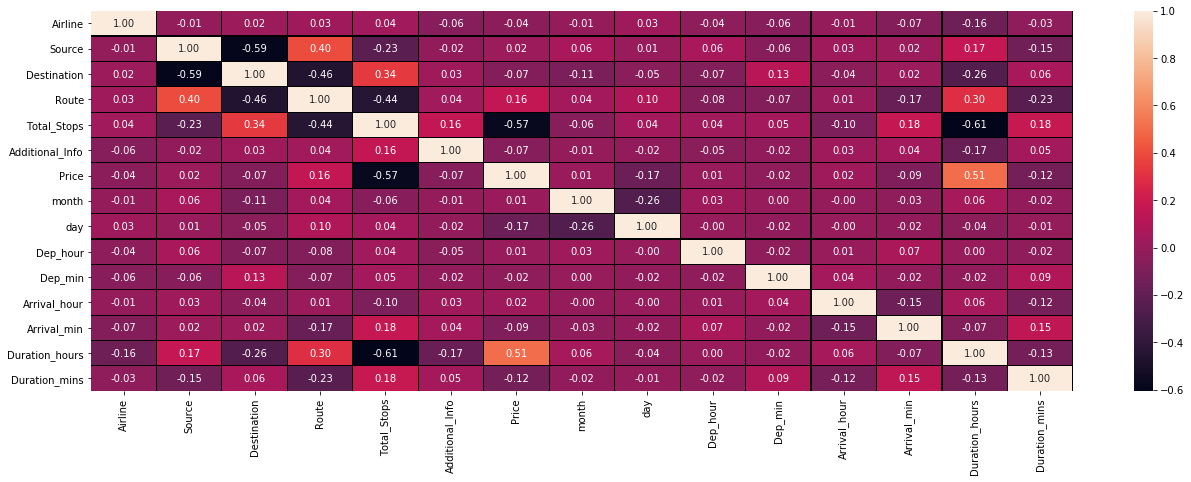

In [76]:
plt.figure(figsize=(22,7))
sns.heatmap(train.corr(),annot=True,linewidth=0.1,linecolor='black',fmt="0.2f")

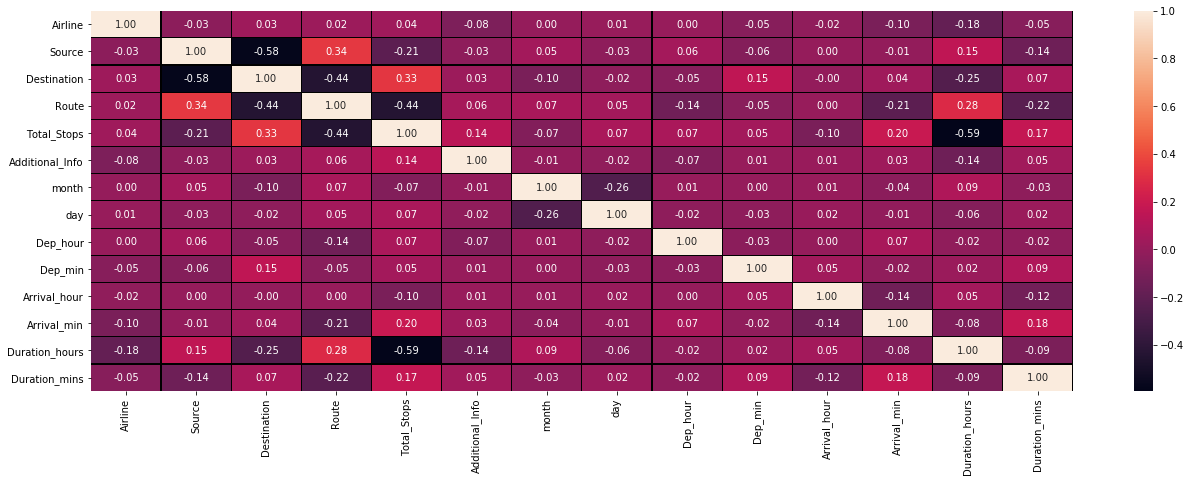

In [77]:
plt.figure(figsize=(22,7))
sns.heatmap(test.corr(),annot=True,linewidth=0.1,linecolor='black',fmt="0.2f")

# Multicollinearity:

In [78]:
#drop the label from feature
x=train.drop('Price',axis=1)
y=train.Price

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns) 

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns

# lets check the vif
vif

,vif,Features
0,3.711663,Airline
1,5.712291,Source
2,3.083369,Destination
3,7.824731,Route
4,3.068616,Total_Stops
5,23.771813,Additional_Info
6,3.452654,month
7,2.370230,day
8,5.411654,Dep_hour
9,2.748001,Dep_min


If vif<5 no multicolinearity
Here Additional_info vif value = 23.77, which is very high, but since we have limited columns only we will keep this.

# Outliers

#### For Train dataset

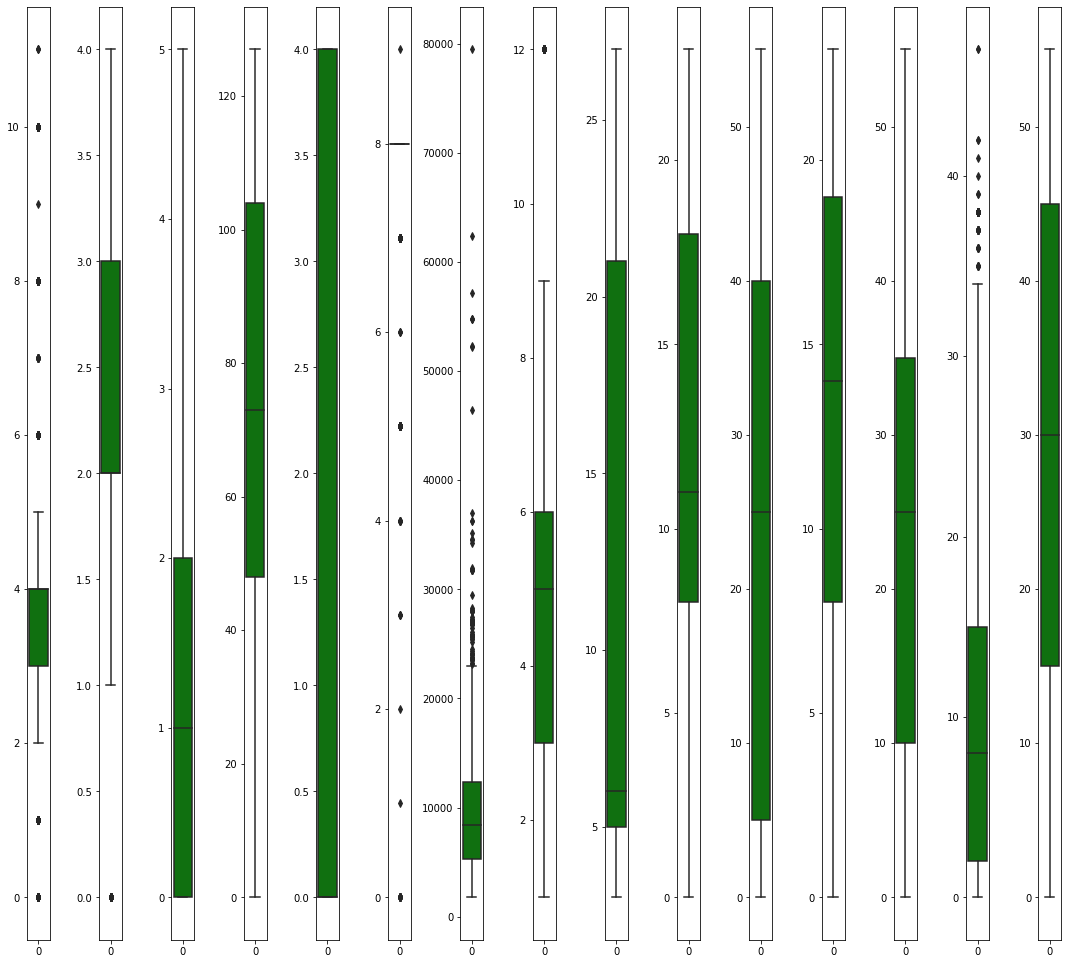

In [81]:
col_list = train.columns.values
ncol = 32
nrows = 12
plt.figure(figsize = (ncol,5*ncol))
for i in range (0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = train[col_list[i]],color = 'green', orient = 'v')
    plt.tight_layout()

#### For Test dataset

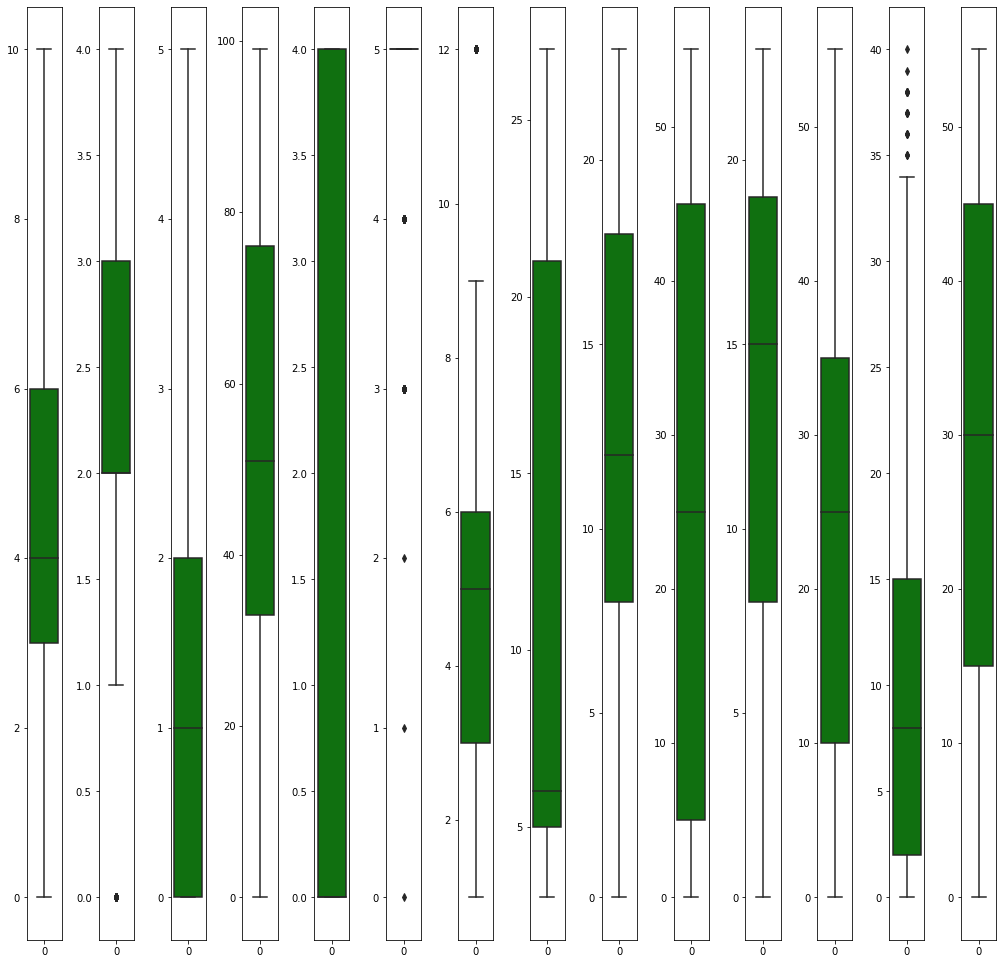

In [82]:
col_list = test.columns.values
ncol = 32
nrows = 12
plt.figure(figsize = (ncol,5*ncol))
for i in range (0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = test[col_list[i]],color = 'green', orient = 'v')
    plt.tight_layout()

# Z Score

#### For Train dataset:

In [83]:
from scipy.stats import zscore
z = np.abs(zscore(train))
z.shape

(10683, 15)

In [84]:
threshold = 3
print(np.where(z>3))

(array([  123,   226,   396,   486,   510,   553,   597,   628,   657,
         785,   785,   826,   936,   946,   959,   966,   969,   975,
        1043,  1067,  1113,  1196,  1246,  1341,  1346,  1424,  1442,
        1466,  1478,  1496,  1551,  1629,  1654,  1657,  1785,  1791,
        1804,  1918,  2055,  2079,  2099,  2108,  2172,  2405,  2481,
        2495,  2495,  2553,  2556,  2556,  2618,  2635,  2641,  2654,
        2693,  2718,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3457,  3535,  3700,  3700,  3788,  3790,  3815,  3966,
        4012,  4047,  4118,  4463,  4521,  4521,  4655,  4676,  4829,
        5013,  5013,  5136,  5372,  5372,  5439,  5516,  5628,  5662,
        5701,  5701,  5710,  5711,  5719,  5738,  5745,  5782,  5856,
        5933,  5953,  5986,  6024,  6059,  6085,  6314,  6321,  6336,
        6407,  6476,  6576,  6576,  6588,  6605,  6884,  6991,  7189,
        7232,  7306,  7329,  7351,  7356,  7377,  7537,  7553,  7554,
        7611,  7612

In [85]:
train_new = train[(z<3).all(axis = 1)]
print(train.shape)
print(train_new.shape)

(10683, 15)
(10513, 15)


In [86]:
loss_percent = (10682-10513)/10682*100
print(loss_percent)

1.5821007302003371


#### Obs: Data Loss is in acceptable range. Good to proceed

#### For Test Dataset:

In [87]:
z = np.abs(zscore(test))
z.shape

(2671, 14)

In [88]:
threshold = 3
print(np.where(z>3))

(array([ 251,  510,  786,  954, 1022, 1271, 1279, 1379, 1511, 1554, 1686,
       1689, 1781, 1802, 1861, 1918, 1945, 2114, 2359, 2472, 2492],
      dtype=int64), array([12, 12, 12,  5, 12, 12, 12, 12, 12, 12, 12, 12, 12,  5,  5, 12, 12,
       12, 12, 12, 12], dtype=int64))


In [89]:
test_new = test[(z<3).all(axis = 1)]
print(test.shape)
print(test_new.shape)

(2671, 14)
(2650, 14)


In [90]:
loss_percent = (2671-2650)/2671*100
print(loss_percent)

0.786222388618495


#### Obs: Data Loss is in acceptable range. Good to proceed

# Skewness

#### For Train dataset:

In [91]:
train_new.skew()

Airline            0.729378
Source            -0.438310
Destination        1.264156
Route             -0.505804
Total_Stops        0.614009
Additional_Info   -1.529239
Price              0.413054
month              0.634765
day                0.354135
Dep_hour           0.104036
Dep_min            0.171190
Arrival_hour      -0.362130
Arrival_min        0.107821
Duration_hours     0.765285
Duration_mins     -0.097648
dtype: float64

In [92]:
from sklearn.preprocessing import power_transform
train = power_transform(train_new,method = 'yeo-johnson')
train

array([[-0.30202571, -1.61249198,  1.77594293, ..., -0.7722817 ,
        -1.16684507,  1.19567652],
       [-1.42468412,  0.89476298, -1.36330889, ..., -0.42946088,
        -0.04050138, -0.10686629],
       [ 0.14082188, -0.02744349,  0.02103334, ...,  0.15876691,
         1.09930267, -1.87948128],
       ...,
       [ 0.14082188, -1.61249198,  0.72576002, ..., -0.12292557,
        -0.84608072, -1.87948128],
       [ 2.11658404, -1.61249198,  1.77594293, ..., -0.7722817 ,
        -1.16684507,  0.69838298],
       [-1.42468412, -0.02744349,  0.02103334, ..., -0.42946088,
         0.10112796, -0.3980755 ]])

#### For Test dataset

In [93]:
test_new.skew()

Airline            0.479632
Source            -0.426851
Destination        1.262189
Route             -0.276778
Total_Stops        0.665735
Additional_Info   -1.655269
month              0.592321
day                0.473589
Dep_hour           0.081606
Dep_min            0.133234
Arrival_hour      -0.432424
Arrival_min        0.108509
Duration_hours     0.796322
Duration_mins     -0.110732
dtype: float64

In [94]:
from sklearn.preprocessing import power_transform
test = power_transform(test_new,method = 'yeo-johnson')
test

array([[ 0.11199698, -0.02370424,  0.00720259, ...,  0.17392696,
         0.33773144,  1.45578078],
       [-0.33522018,  0.88325054, -1.37367531, ..., -0.10094497,
        -0.61010961, -1.89202596],
       [ 0.11199698, -0.02370424,  0.00720259, ..., -1.72788745,
         1.35819308,  0.95917276],
       ...,
       [ 0.11199698, -0.02370424,  0.00720259, ...,  0.17392696,
        -0.2154371 ,  0.43775285],
       [-1.42047624, -0.02370424,  0.00720259, ..., -0.40138796,
         0.81715113, -0.7235876 ],
       [ 0.89933522, -0.02370424,  0.00720259, ..., -0.40138796,
         0.73318992, -0.41238058]])

# Feature Importance

In [95]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [96]:
print(selection.feature_importances_)

[0.12804327 0.01138202 0.02478575 0.05558765 0.3816834  0.05733145
 0.07888706 0.095992   0.0213316  0.01956263 0.02756785 0.01847307
 0.06359959 0.01577266]


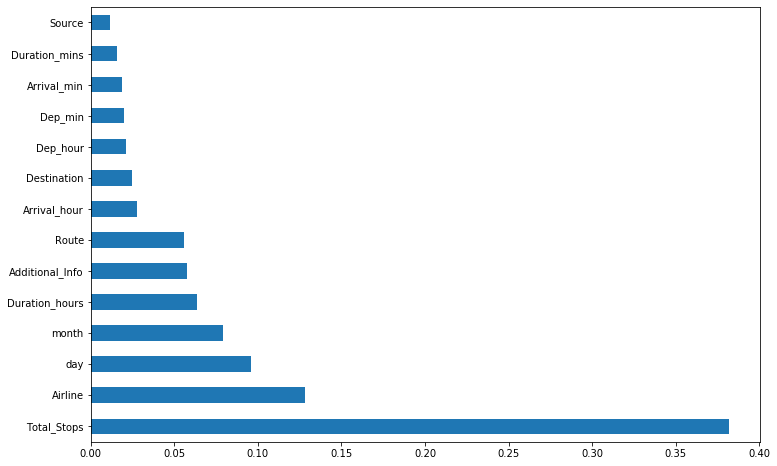

In [97]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#### Obs: Total_Stops and Airline features have high feature importance and Source, Duration_mins have less feature importance.

# Scaling

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)
x = pd.DataFrame(x_scaled, columns= x.columns)
x.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,-0.410675,-1.658441,2.416665,-1.547183,1.407309,0.499892,-0.848503,1.285632,1.654259,-0.235050,-1.800427,-0.890057,-0.970698,1.279008
1,-1.260999,0.890052,-0.973826,0.249876,-0.253632,0.499892,-1.517993,-0.872652,-1.303095,1.363492,-0.050851,-0.587124,-0.382117,-0.196388
2,0.014486,0.040555,-0.295728,1.175633,-0.253632,0.499892,1.159966,-0.759058,-0.607247,0.031373,-1.363033,0.018744,1.030476,-1.671784
3,-0.410675,0.890052,-0.973826,0.440473,-0.807278,0.499892,2.164201,-0.872652,0.958411,-1.034321,1.407129,0.321677,-0.617549,-0.196388
4,-0.410675,-1.658441,2.416665,-1.247673,-0.807278,0.499892,-1.517993,-1.099840,0.610487,1.363492,1.115533,0.624611,-0.735265,0.983929


# Model Building:

In [99]:
## Importing machine learning Library
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [100]:
def maxr2_score(clf,X,Y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std()*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    return final_r

# Linear Regression:

max r2 score corresponding to 77 is 47.35973366723888


cross validation score 41.66346040027785


Standard Deviation 1.1294751222130983


Training accuracy 41.14719712781644


Test Accuracy 44.996730669207786


MAE 2454.105865474827


MSE 10878515.301480109


RMSE 3298.2594351384955




77

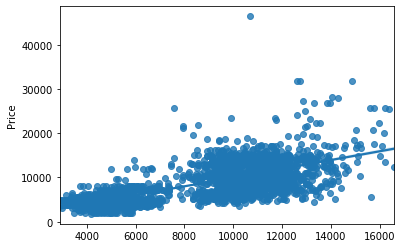

In [101]:
lr=LinearRegression()
maxr2_score(lr,x,y)

# KNN Regressor:

max r2 score corresponding to 77 is 78.73854263311941


cross validation score 72.08831353773434


Standard Deviation 2.010235233862838


Training accuracy 81.76453123578149


Test Accuracy 75.94929091420585


MAE 1340.9853065044454


MSE 4756735.5538043985


RMSE 2180.9941663847703




77

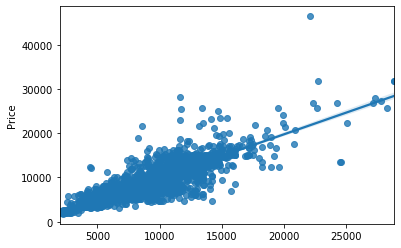

In [102]:
knn = KNeighborsRegressor()
maxr2_score(knn,x,y)

# Random Forest:  

max r2 score corresponding to 77 is 93.76203811719704


cross validation score 87.96336756524147


Standard Deviation 2.3412537077736846


Training accuracy 97.98455025718926


Test Accuracy 88.90350056896008


MAE 660.9111440882857


MSE 2194659.341564897


RMSE 1481.4382678886411




77

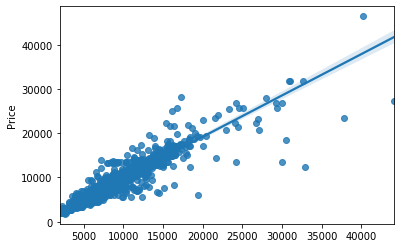

In [103]:
rf = RandomForestRegressor()
maxr2_score(rf,x,y)

# Gradient Boosting Regressor:

max r2 score corresponding to 75 is 85.95071156149491


cross validation score 82.37316390358156


Standard Deviation 0.87241964225683


Training accuracy 83.46461639039366


Test Accuracy 84.38919718513533


MAE 1230.0625805697823


MSE 3087495.695366296


RMSE 1757.127114174241




75

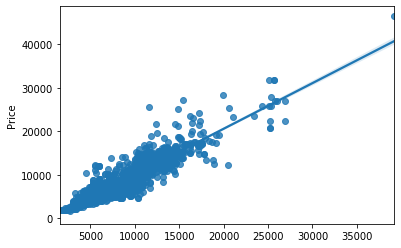

In [104]:
gbr = GradientBoostingRegressor()
maxr2_score(gbr,x,y)

# Decision Tree Regressor:

max r2 score corresponding to 98 is 87.56731006868772


cross validation score 80.09070349534824


Standard Deviation 3.0455665576623248


Training accuracy 99.61922029607149


Test Accuracy 78.68759053680492


MAE 745.269770706598


MSE 4215156.2130322885


RMSE 2053.084560614172




98

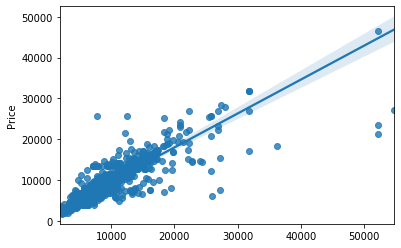

In [105]:
dt = DecisionTreeRegressor()
maxr2_score(dt,x,y)

# Ada Boost Regressor:

max r2 score corresponding to 82 is 55.409753042682674


cross validation score 27.37215411117398


Standard Deviation 11.214356225840719


Training accuracy 21.422131036684288


Test Accuracy 13.731244721178404


MAE 3515.020341859655


MSE 17062185.316590283


RMSE 4130.63981927622




82

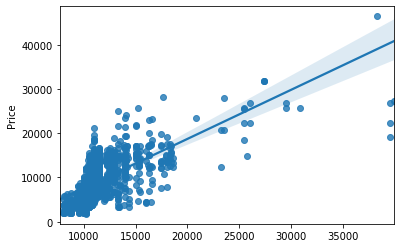

In [106]:
adb = AdaBoostRegressor()
maxr2_score(adb,x,y)

# SVM Regressor:

max r2 score corresponding to 64 is 5.0520352084414855


cross validation score 3.0101816439587803


Standard Deviation 0.9897362504041296


Training accuracy 2.877641750340465


Test Accuracy 4.040860707397121


MAE 3411.3581882351473


MSE 18978743.95126262


RMSE 4356.460025211137




64

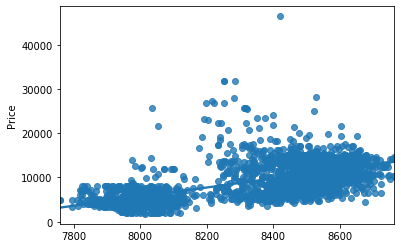

In [107]:
svm=SVR()
maxr2_score(svm,x,y)

#### Obs: Concidering the above models and their values, we pick the RandomForest Regressor as the best model for our prediction, with max r2 score = 93.76 & CV score = 87.96.

# GridSearchCV

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [109]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,20],
             'max_depth':[2,4,6]}

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=77)

grid=GridSearchCV(rf,parameters,scoring='r2',cv=5)
GCV = grid.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 20}

In [111]:
GCV.score(x_train,y_train)

0.8193033795332897

In [112]:
y_preds_RFR=GCV.predict(x_test)
rmse_RFR=np.sqrt(mean_squared_error(y_preds_RFR,y_test))
print('RMSE for RandomForest Regression :{0:.2f}'.format(rmse_RFR))

RMSE for RandomForest Regression :1770.67


In [113]:
RandomForest = RandomForestRegressor(criterion = 'mse', max_features = 'auto', max_depth = 6 , n_estimators = 20 )
RandomForest.fit(x_train,y_train)
RandomForest.score(x_train,y_train)

pred_decision = RandomForest.predict(x_test)
RandomForestS = r2_score(y_test,pred_decision)
print('R2 Score:', RandomForestS*100)

RandomForestScore = cross_val_score(RandomForest,x,y,cv = 5)
RandomForestC = RandomForestScore.mean()
print("Cross Val Score:",RandomForestC*100)

R2 Score: 83.9379393026908
Cross Val Score: 78.02429390010816


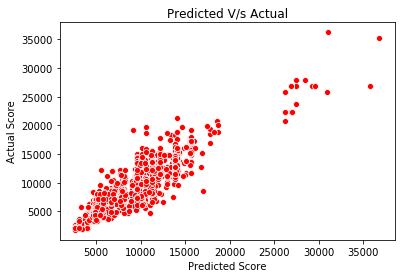

In [114]:
sns.scatterplot(x = pred_decision, y = y_test, color = 'red')
plt.xlabel('Predicted Score')
plt.ylabel('Actual Score')
plt.title('Predicted V/s Actual')
plt.show()

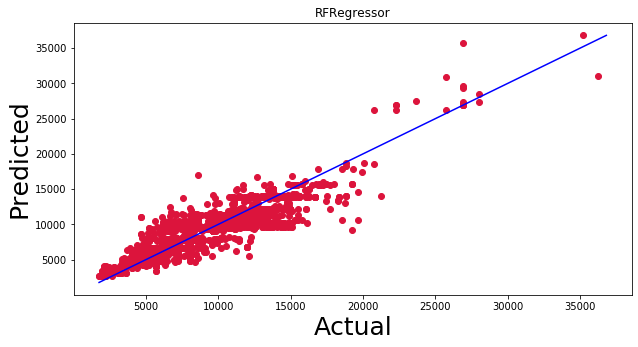

In [115]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, pred_decision, c='crimson')
p1 = max(max(pred_decision), max(y_test))
p2 = min(min(pred_decision), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=25)
plt.ylabel('Predicted', fontsize=25)
plt.title("RFRegressor")
plt.show()


#### Obs: The graphs seems fairly ;linear, which is good. And the accuracy of RandomForest post tuning is 93.76, which is pretty good.

# Saving Model

In [116]:
import pickle
filename = 'flight_price.pkl'
pickle.dump(rf,open(filename, 'wb'))

In [117]:
loaded_model = pickle.load(open("flight_price.pkl", "rb"))
result = loaded_model.score(x_test, y_test)
print(result)

0.9782283262078565


# Conclusion

In [118]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index = ["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136
Predicted,7229.000000,11062.092000,12575.910000,10523.595000,10778.850000,10950.640000,11087.000000,5297.180000,4804.470000,15879.540000,...,4498.240000,5073.850000,6614.160000,5053.590000,16012.050000,2325.540000,13594.410000,3500.960000,8636.070000,5388.720000
Original,6949.091773,9570.976691,9570.976691,9570.976691,11287.905257,11287.905257,12975.894454,4545.148131,5091.514479,15681.580897,...,4853.516127,4853.516127,7716.113937,5480.774316,14058.095576,3031.044921,13919.424983,5007.542864,7887.726405,5711.523063
